<h2 style='color:purple' align='center'>Training And Testing Available Data</h2>

<p><b>We have a dataset containing prices of used BMW cars. We are going to analyze this dataset
and build a prediction function that can predict a price by taking mileage and age of the car
as input. We will use sklearn train_test_split method to split training and testing dataset</b></p>

In [42]:
import pandas as pd
df = pd.read_csv("carprices.csv")
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

**Car Mileage Vs Sell Price ($)**

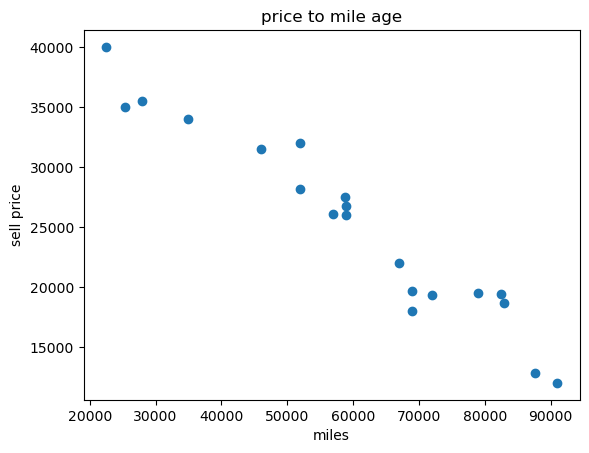

In [44]:
plt.xlabel("miles")
plt.ylabel("sell price")
plt.title("price to mile age")
plt.scatter(df['Mileage'],df['Sell Price($)'])

**Car Age Vs Sell Price ($)**

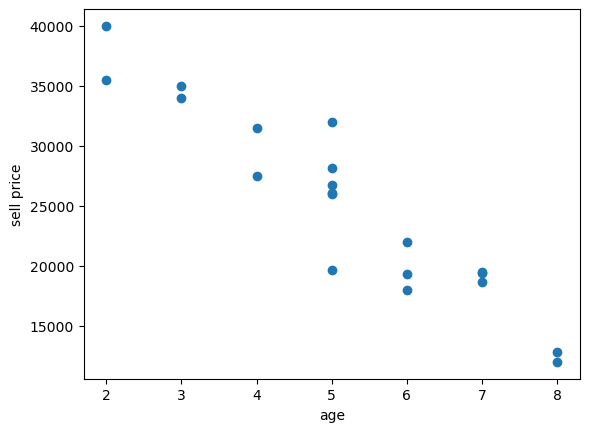

In [45]:
plt.xlabel("age")
plt.ylabel("sell price")
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

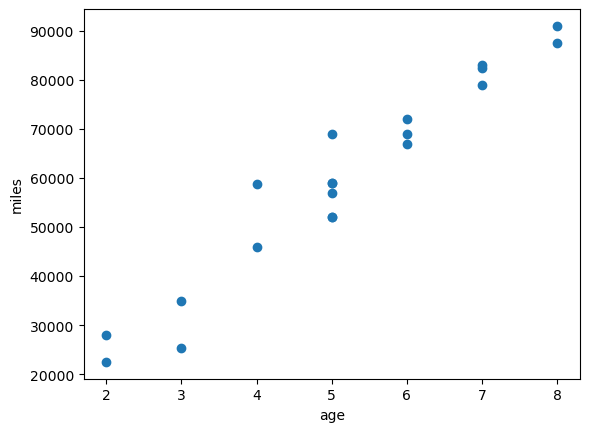

In [46]:
plt.ylabel("miles")
plt.xlabel("age")
plt.scatter(df['Age(yrs)'],df['Mileage'])

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

<p style='color:purple'><b>The approach we are going to use here is to split available data in two sets</b></p>
    <ol>
        <b>
        <li>Training: We will train our model on this dataset</li>
        <li>Testing: We will use this subset to make actual predictions using trained model</li>
        </b>
     </ol>
<p style='color:purple'><b>The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
</b></p>

In [47]:
X = df[['Mileage','Age(yrs)']]

In [48]:
X 

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [49]:
y = df['Sell Price($)']
y 

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

**Train Test split:** <br> 

X : features ( to be trained )  
x train <br>
x test      <br> 

y : result ( to be predicted ) <br> 
y train <br> 
y test 

![tit;(https://www.sharpsightlabs.com/wp-content/uploads/2022/05/sklearn-train-test-split_FEATURED-IMAGE.png)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [62]:
X_train

,Mileage,Age(yrs)
0,69000,6
4,46000,4
14,82450,7
3,22500,2
8,91000,8
9,67000,6
18,87600,8
13,58780,4
6,52000,5
19,52000,5


In [63]:
X_test

,Mileage,Age(yrs)
1,35000,3
15,25400,3
7,72000,6
2,57000,5


In [64]:
y_train

0     18000
4     31500
14    19400
3     40000
8     12000
9     22000
18    12800
13    27500
6     32000
19    28200
12    26000
17    19700
10    18700
16    35500
5     26750
11    19500
Name: Sell Price($), dtype: int64

In [65]:
y_test

1     34000
15    35000
7     19300
2     26100
Name: Sell Price($), dtype: int64

**Lets run linear regression model now**

In [66]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train) # actual training ( learn )

LinearRegression()

In [67]:
X_test

,Mileage,Age(yrs)
1,35000,3
15,25400,3
7,72000,6
2,57000,5


In [68]:
y_predicted = clf.predict(X_test)
y_predicted 

array([35096.68979615, 39101.60411701, 20749.37973675, 26644.29262345])

In [69]:
y_test.values.flatten()

array([34000, 35000, 19300, 26100])

In [70]:
clf.score(X_train, y_train) # training accuracy

0.9346444477058686

In [71]:
clf.score(X_test, y_test) # test accuracy 

0.8745987908456376

**random_state argument**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_test

,Mileage,Age(yrs)
0,69000,6
17,69000,5
15,25400,3
1,35000,3
8,91000,8


In [73]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [74]:
clf.score(X_train, y_train)

0.9483607388294643

In [75]:
clf.score(X_test, y_test)

0.8873802019349589

In [38]:
print(df["Mileage"].mean())
df["Mileage"].std()

59736.5


20595.441824524387

In [39]:
print(df["Age(yrs)"].mean())
df["Age(yrs)"].std()

5.15


1.7851728502481652

In [38]:
for i in df.columns[:2]:
    print(i)
    print(df[i].mean())
    print(df[i].std())
    print()

Mileage
59736.5
20595.441824524387

Age(yrs)
5.15
1.7851728502481652



In [39]:
df.describe()

,Mileage,Age(yrs),Sell Price($)
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,25197.500000
std,20595.441825,1.785173,7834.479713
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,26050.000000
75%,73750.000000,6.250000,31625.000000
max,91000.000000,8.000000,40000.000000
